In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)


data_path = '../data/household_power_consumption_hourly_with_anomalies.csv'
df = pd.read_csv(data_path, index_col='DateTime', parse_dates=True)

print("Дані успішно завантажено. Розмір:", df.shape)
df.head()

Дані успішно завантажено. Розмір: (34560, 8)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly
DateTime,,,,,,,,
2006-12-17 10:00:00,166.352,10.264,234.446486,19.275676,533.0,1341.0,623.0,0
2006-12-17 11:00:00,105.120,6.248,235.731622,12.140541,567.0,296.0,630.0,0
2006-12-17 12:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0
2006-12-17 13:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0
2006-12-17 14:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0


In [2]:
def create_temporal_features(df_input):
    """
    Створює нові часові ознаки з datetime індексу.
    """
    df = df_input.copy()

    # Використовуємо атрибути індексу для створення нових стовпців
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek  # Понеділок=0, Неділя=6
    df['day_of_month'] = df.index.day
    df['day_of_year'] = df.index.dayofyear
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter

    # Створимо бінарну ознаку для вихідних
    df['is_weekend'] = (df.index.dayofweek >= 5).astype(int) # 1 - якщо вихідний, 0 - якщо ні

    return df

# Застосовуємо функцію до нашого датасету
df_with_features = create_temporal_features(df)

print("Перші 5 рядків з новими часовими ознаками:")
display(df_with_features.head())

print("\nОстанні 5 рядків для перевірки:")
display(df_with_features.tail())

Перші 5 рядків з новими часовими ознаками:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly,hour,day_of_week,day_of_month,day_of_year,week_of_year,month,year,quarter,is_weekend
DateTime,,,,,,,,,,,,,,,,,
2006-12-17 10:00:00,166.352,10.264,234.446486,19.275676,533.0,1341.0,623.0,0,10,6,17,351,50,12,2006,4,1
2006-12-17 11:00:00,105.120,6.248,235.731622,12.140541,567.0,296.0,630.0,0,11,6,17,351,50,12,2006,4,1
2006-12-17 12:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,12,6,17,351,50,12,2006,4,1
2006-12-17 13:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,13,6,17,351,50,12,2006,4,1
2006-12-17 14:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,14,6,17,351,50,12,2006,4,1



Останні 5 рядків для перевірки:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly,hour,day_of_week,day_of_month,day_of_year,week_of_year,month,year,quarter,is_weekend
DateTime,,,,,,,,,,,,,,,,,
2010-11-26 05:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,5,4,26,330,47,11,2010,4,0
2010-11-26 06:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0,6,4,26,330,47,11,2010,4,0
2010-11-26 07:00:00,25.896,0.956,238.299000,10.780000,12.0,14.0,174.0,0,7,4,26,330,47,11,2010,4,0
2010-11-26 08:00:00,118.536,6.732,239.713729,8.376271,534.0,40.0,1040.0,0,8,4,26,330,47,11,2010,4,0
2010-11-26 09:00:00,87.676,3.016,239.478810,8.714286,534.0,0.0,739.0,0,9,4,26,330,47,11,2010,4,0


/var/folders/qx/qcg8gq_95sj0ckv67r12b2yw0000gn/T/ipykernel_29792/3592077149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_consumption.index, y=hourly_consumption.values, ax=ax1, palette='viridis')
/var/folders/qx/qcg8gq_95sj0ckv67r12b2yw0000gn/T/ipykernel_29792/3592077149.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_names, y=daily_consumption.values, ax=ax2, palette='plasma')


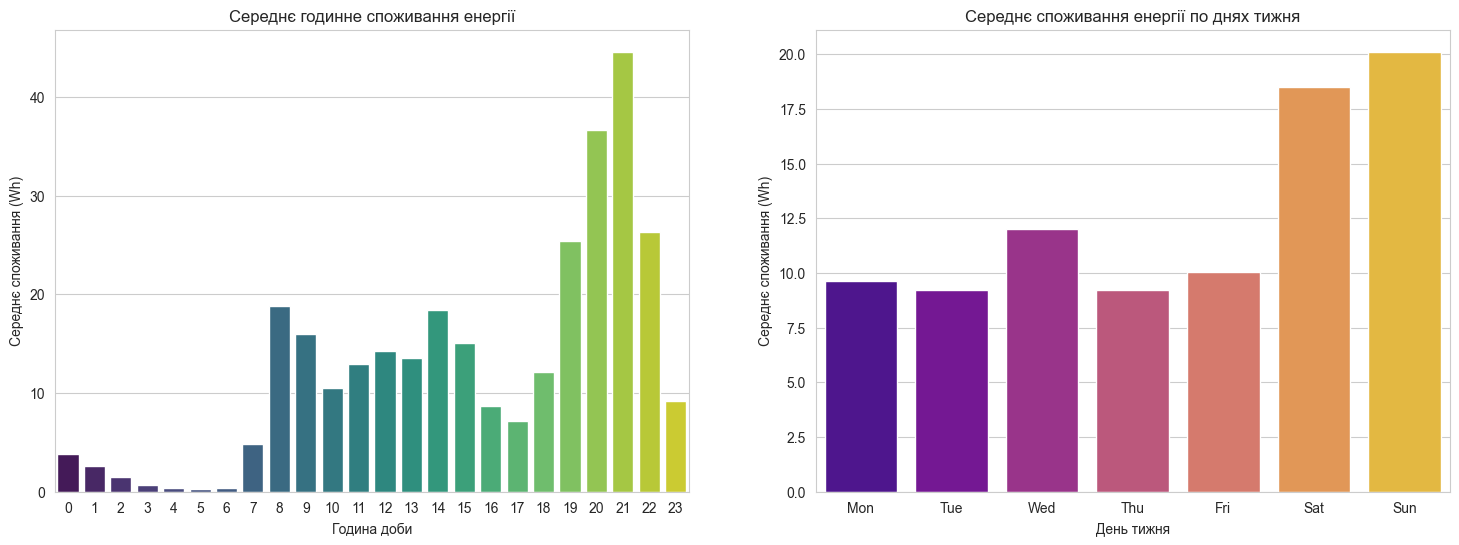

In [3]:
# Агрегуємо середнє споживання по годинах
hourly_consumption = df_with_features.groupby('hour')['Global_active_power'].mean()

# Агрегуємо середнє споживання по днях тижня
daily_consumption = df_with_features.groupby('day_of_week')['Global_active_power'].mean()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


# Створюємо графіки
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Графік по годинах
sns.barplot(x=hourly_consumption.index, y=hourly_consumption.values, ax=ax1, palette='viridis')
ax1.set_title('Середнє годинне споживання енергії')
ax1.set_xlabel('Година доби')
ax1.set_ylabel('Середнє споживання (Wh)')

# Графік по днях тижня
sns.barplot(x=day_names, y=daily_consumption.values, ax=ax2, palette='plasma')
ax2.set_title('Середнє споживання енергії по днях тижня')
ax2.set_xlabel('День тижня')
ax2.set_ylabel('Середнє споживання (Wh)')

plt.show()

In [4]:
# Зберігаємо DataFrame з новими ознаками
output_path = '../data/data_with_temporal_features.csv'
df_with_features.to_csv(output_path)

print(f"DataFrame з часовими ознаками успішно збережено в: {output_path}")

DataFrame з часовими ознаками успішно збережено в: ../data/data_with_temporal_features.csv
